In [17]:
import sys
assert sys.version_info.major == 3, "Please use Python3!"
assert sys.version_info.minor >= 7, "This lab requires Python 3.7 or higher."
print("Python version checks passed.")

Python version checks passed.


In [18]:
%pip install networkx
%pip install decorator==5.0.9

You should consider upgrading via the '/Users/ashish/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [19]:
%matplotlib inline
from typing import Iterable, Tuple, Set

import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [20]:
Vertex = int

class Graph:
    def __init__(self, num_vertices: int):
        self.vertices = [Vertex(i) for i in range(num_vertices)]
        self.adjacency_lists = dict()
        for v in self.vertices:
            self.adjacency_lists[v] = set()

    def get_neighbors(self, vertex: Vertex):
        if vertex not in self.vertices:
            raise ValueError(f"Given vertex {vertex} not found in vertex set.")
        return self.adjacency_lists[vertex]

    def add_edge(self, v1: Vertex, v2: Vertex):
        if v1 not in self.vertices or v2 not in self.vertices:
            raise ValueError(
                f"One of given vertices {v1} or {v2} not found in vertex set."
            )
        self.adjacency_lists[v1].add(v2)
        self.adjacency_lists[v2].add(v1)

    def add_edges(self, edge_list: Iterable[Tuple[Vertex, Vertex]]):
        for v1, v2 in edge_list:
            self.add_edge(v1, v2)

In [21]:
def G_ER(n: int, p: float) -> Graph:
    graph = Graph(n)
    for u, v in itertools.combinations(graph.vertices, 2):
        if np.random.rand() < p:
            graph.add_edge(u, v)
    return graph

In [22]:
def draw_graph(
    graph: Graph, 
    graph_layout='shell',
    node_size=3200, 
    node_color='blue',
    node_alpha=0.3,
    node_text_size=24,
    edge_color='blue',
    edge_alpha=0.3,
    edge_tickness=2,
    text_font='sans-serif',
):
    nx_graph = nx.Graph()
    for v1 in graph.vertices:
        nx_graph.add_node(v1)
        for v2 in graph.get_neighbors(v1):
            nx_graph.add_edge(v1, v2)   
    if graph_layout == 'spring':
        graph_pos = nx.spring_layout(nx_graph)
    elif graph_layout == 'spectral':
        graph_pos = nx.spectral_layout(nx_graph)
    elif graph_layout == 'random':
        graph_pos = nx.random_layout(nx_graph)
    else:
        graph_pos=nx.shell_layout(nx_graph)
    nx.draw_networkx_nodes(
        nx_graph, 
        graph_pos, 
        node_size=node_size, 
        alpha=node_alpha,
        node_color=node_color
    )
    nx.draw_networkx_edges(
        nx_graph,
        graph_pos,
        width=edge_tickness,
        alpha=edge_alpha,
        edge_color=edge_color
    )
    nx.draw_networkx_labels(
        nx_graph,
        graph_pos,
        font_size=node_text_size,
        font_family=text_font
    )
    plt.show()

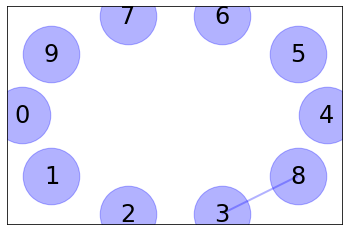

In [23]:
graph = G_ER(10, 0.1)
draw_graph(graph)

Stochasitc block model(SBM)

In [24]:
def G_SBM(n: int, p: float, q: float) -> Graph:
    assert n % 2 == 0
    assert p > q
    graph = Graph(n)
    mid = n // 2
    communityA = graph.vertices[:mid]
    communityB = graph.vertices[mid:]
    for u, v in itertools.combinations(communityA, 2):
        if np.random.rand() < p:
            graph.add_edge(u, v)
    for u, v in itertools.combinations(communityB, 2):
        if np.random.rand() < p:
            graph.add_edge(u, v)
    for u, v in itertools.product(communityA, communityB): 
        if np.random.rand() < q:
            graph.add_edge(u, v)
    return graph

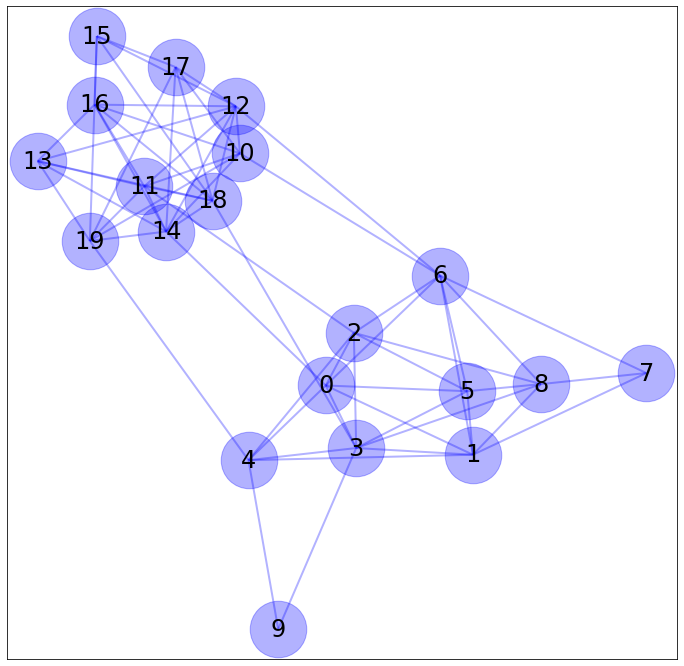

In [25]:
graph = G_SBM(20, 0.6, 0.05)
plt.figure(figsize=(12, 12))
draw_graph(graph,graph_layout='spring')

Find the 2 communites using MLE

In [26]:
def count_crossing_edges(community: Set[Vertex], graph: Graph) -> int:
    other = set(graph.vertices).difference(set(community))
    num_crossings = 0
    for u in community:
        for v in other:
            if v in graph.get_neighbors(u):
                num_crossings += 1
    return num_crossings

#tries to partition into 2 communites of equal size
def mle(graph: Graph) -> Iterable[Vertex]:
    possible_comms = set(
        itertools.combinations(graph.vertices, len(graph.vertices)//2)
    )
    return min(possible_comms, key=lambda comm: count_crossing_edges(comm, graph))

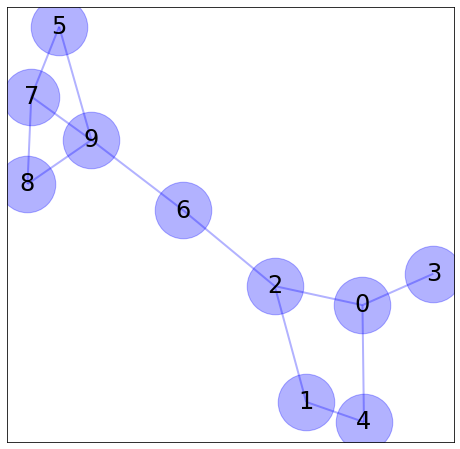

In [27]:
graph = G_SBM(10, 0.6, 0.05)
plt.figure(figsize=(8, 8))
draw_graph(graph,graph_layout='spring')

In [28]:
community = mle(graph)
assert len(community) == 5

print('The community found is the nodes', community)

The community found is the nodes (5, 6, 7, 8, 9)
